<a href="https://colab.research.google.com/github/ayushash1/machine_learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Loading Data

In [26]:
#Loading Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
print("training data", x_train.shape)
print("testing data", x_test.shape)

training data (60000, 28, 28)
testing data (10000, 28, 28)


In [28]:
print(y_train[0:10])
print(y_test[0:10])

[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


## Reshaping the data:

* The original shape of each image in the MNIST dataset is (28, 28).
* The CNN layers in TensorFlow expect input data with a shape that includes the number of channels. Grayscale images have one channel.
* Therefore, reshape is used to add a single channel to each image. The new shape becomes (28, 28, 1).

## Convert to float32 and Normalize:
* The pixel values in the original images are integers ranging from 0 to 255.
* Converting the data to float32 ensures that the division operation (next step) is performed with floating-point numbers.
* Normalize the pixel values by dividing each pixel value by 255. This scales the pixel values to the range [0, 1].

In [29]:
# Reshaping the data to have a single channel (grayscale) and normalize it
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [30]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Defining a simple convolutional neural network (CNN) model

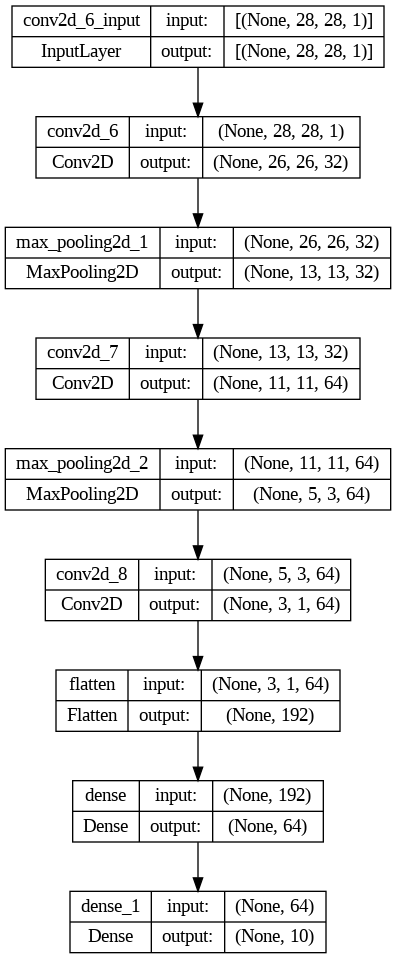

In [34]:
model = models.Sequential()

# Input layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Pooling layer
model.add(layers.MaxPool2D((2,2)))

# Additional Convolutional Layers to further increase complexity of feature extraction
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,3)))

model.add(layers.Conv2D(64,(3,3), activation='relu'))

# Flatten the 3D output to a 1D vector before feeding it into the dense layers
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(64, activation='relu'))
# The final output layer with 10 neurons (one for each digit) and softmax activation
model.add(layers.Dense(10, activation='softmax'))


# Plotting the model
plot_model(model, show_shapes=True, show_layer_names=True, to_file="model.png")
Image('model.png')

# Compiling and Training Model

In [37]:
# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 44s 57ms/step - loss: 0.2399 - accuracy: 0.9285 - val_loss: 0.0973 - val_accuracy: 0.9702
Epoch 2/5
750/750 [==============================] - 43s 57ms/step - loss: 0.0667 - accuracy: 0.9792 - val_loss: 0.0525 - val_accuracy: 0.9838
Epoch 3/5
750/750 [==============================] - 43s 57ms/step - loss: 0.0460 - accuracy: 0.9855 - val_loss: 0.0461 - val_accuracy: 0.9868
Epoch 4/5
750/750 [==============================] - 42s 57ms/step - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.0501 - val_accuracy: 0.9859
Epoch 5/5
750/750 [==============================] - 42s 57ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0479 - val_accuracy: 0.9864


# Model Evaluation

In [38]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0372 - accuracy: 0.9890
Test accuracy: 0.9890000224113464
